In [3]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import models,datasets, layers

import PIL
import cv2
import os
import matplotlib.pyplot as plt

In [5]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
dataset = tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar= True)

228827136/228813984 [==============================] - 8s 0us/step


In [6]:
dataset

'.\\datasets\\flower_photos'

In [13]:
import pathlib
data_dir = pathlib.Path(dataset)
data_dir

WindowsPath('datasets/flower_photos')

In [18]:
image_count= len(list(data_dir.glob('*/*.jpg')))

In [20]:
roses= list(data_dir.glob('roses/*.jpg'))

In [24]:
tulips= list(data_dir.glob('tulips/*.jpg'))

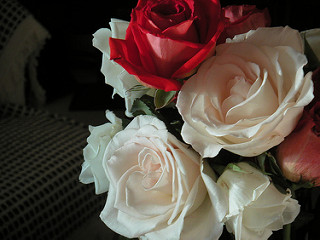

In [23]:
PIL.Image.open(roses[1])

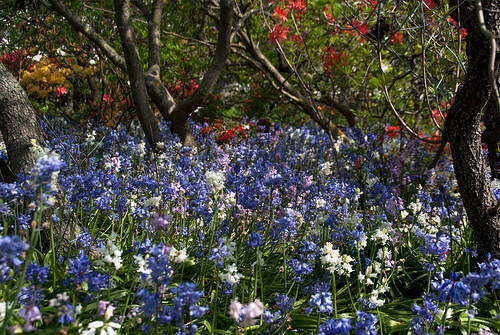

In [25]:
PIL.Image.open(tulips[1])

In [27]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*.jpg')),
    'daisy': list(data_dir.glob('daisy/*.jpg')),
    'dandelian': list(data_dir.glob('dandelian/*.jpg')),
    'sunflowers': list(data_dir.glob('sunflowers/*.jpg')),
    'tulips': list(data_dir.glob('tulips/*.jpg'))
}

In [28]:
flowers_labels_dict ={
    'roses':0,
    'daisy':1,
    'dandelian':2,
    'sunflowers':3,
    'tulips':4
}

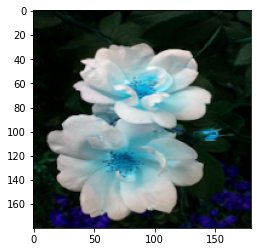

In [44]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
resized = cv2.resize(img,(180,180))
plt.imshow(resized)

In [34]:
x, y= [], []
for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized = cv2.resize(img,(180,180))
        x.append(resized)
        y.append(flowers_labels_dict[flower_name])

In [36]:
x[0].shape

(180, 180, 3)

In [37]:
y[0]

0

In [38]:
x= np.array(x)
y= np.array(y)

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=101)

In [49]:
x_train_scaled =x_train/255
x_test_scaled = x_test/255

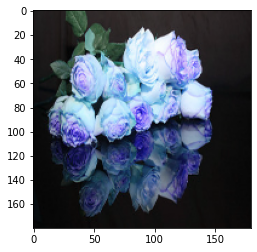

In [50]:
plt.imshow(x_train_scaled[0])

In [52]:
cnn = models.Sequential([
    layers.Conv2D(filters= 16, kernel_size=(3,3), padding='same',activation = 'relu'),
    layers.MaxPool2D(),
    layers.Conv2D(filters= 32, kernel_size=(3,3), padding='same',activation = 'relu'),
    layers.MaxPool2D(),
    layers.Conv2D(filters= 64, kernel_size=(3,3), padding='same',activation = 'relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(5,activation = 'softmax')
])

cnn.compile(optimizer='adam', loss= tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

cnn.fit(x_train_scaled,y_train,epochs=10)

Epoch 1/10
65/65 [==============================] - 28s 416ms/step - loss: 1.0612 - accuracy: 0.5315
Epoch 2/10
65/65 [==============================] - 29s 442ms/step - loss: 0.8176 - accuracy: 0.6604
Epoch 3/10
65/65 [==============================] - 29s 453ms/step - loss: 0.6617 - accuracy: 0.7518
Epoch 4/10
65/65 [==============================] - 29s 451ms/step - loss: 0.5306 - accuracy: 0.7937
Epoch 5/10
65/65 [==============================] - 29s 450ms/step - loss: 0.3642 - accuracy: 0.8658
Epoch 6/10
65/65 [==============================] - 31s 473ms/step - loss: 0.2252 - accuracy: 0.9254
Epoch 7/10
65/65 [==============================] - 34s 519ms/step - loss: 0.1250 - accuracy: 0.9596
Epoch 8/10
65/65 [==============================] - 34s 528ms/step - loss: 0.0997 - accuracy: 0.9668
Epoch 9/10
65/65 [==============================] - 31s 470ms/step - loss: 0.0672 - accuracy: 0.9817
Epoch 10/10
65/65 [==============================] - 31s 471ms/step - loss: 0.0186 - accura

In [53]:
y_pred = cnn.predict(x_test_scaled)
y_pred = [np.argmax(y) for y in y_pred]
print(y_test[0],y_pred[0])

4 4


In [54]:
cnn.evaluate(x_test_scaled,y_test)

22/22 [==============================] - 2s 93ms/step - loss: 1.5843 - accuracy: 0.6652


[1.5843299627304077, 0.6652236580848694]

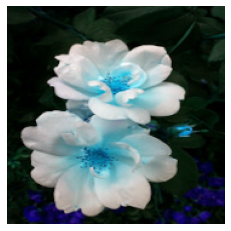

In [55]:
plt.axis('off')
plt.imshow(x[0])

In [89]:
data_augmentation =tf.keras.Sequential([
      layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomZoom(0.5),
    layers.experimental.preprocessing.RandomRotation(0.5)
])

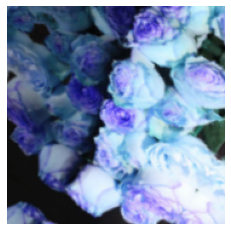

In [90]:
plt.axis('off')
plt.imshow(data_augmentation(x_train_scaled)[0])

In [91]:
cnn_aug = models.Sequential([
    data_augmentation,
    layers.Conv2D(filters= 16, kernel_size=(3,3), padding='same',activation = 'relu'),
    layers.MaxPool2D(),
    layers.Conv2D(filters= 32, kernel_size=(3,3), padding='same',activation = 'relu'),
    layers.MaxPool2D(),
    layers.Conv2D(filters= 64, kernel_size=(3,3), padding='same',activation = 'relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(5,activation = 'softmax')
])

cnn_aug.compile(optimizer='adam', loss= tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

cnn_aug.fit(x_train_scaled,y_train,epochs=10)

Epoch 1/10
65/65 [==============================] - 35s 532ms/step - loss: 1.1343 - accuracy: 0.4772
Epoch 2/10
65/65 [==============================] - 36s 548ms/step - loss: 0.9891 - accuracy: 0.5806
Epoch 3/10
65/65 [==============================] - 35s 535ms/step - loss: 0.8990 - accuracy: 0.6287
Epoch 4/10
65/65 [==============================] - 35s 535ms/step - loss: 0.8263 - accuracy: 0.6561
Epoch 5/10
65/65 [==============================] - 35s 530ms/step - loss: 0.8248 - accuracy: 0.6556
Epoch 6/10
65/65 [==============================] - 34s 524ms/step - loss: 0.7779 - accuracy: 0.6729
Epoch 7/10
65/65 [==============================] - 35s 535ms/step - loss: 0.7604 - accuracy: 0.6787
Epoch 8/10
65/65 [==============================] - 34s 528ms/step - loss: 0.7461 - accuracy: 0.6835
Epoch 9/10
65/65 [==============================] - 35s 536ms/step - loss: 0.6961 - accuracy: 0.7013
Epoch 10/10
65/65 [==============================] - 34s 524ms/step - loss: 0.7134 - accura

In [92]:
y_pred = cnn_aug.predict(x_test_scaled)
y_pred = [np.argmax(y) for y in y_pred]
print(y_test[0],y_pred[0])

4 1


In [93]:
cnn_aug.evaluate(x_test_scaled,y_test)

22/22 [==============================] - 3s 133ms/step - loss: 0.6937 - accuracy: 0.7013


[0.6936976909637451, 0.701298713684082]